<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/telco_customer_churn_11_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELCO CUSTOMER CHURM PREDICTION**

---


We will use classification algorithms to predict the Telco customer churn based on the various features provided in the dataset


---

This dataset is sourced from: https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3

---

The algorithms demonstrate an average accuracy level of up to 98%.

---

The most influential features contributing to the prediction are:

1. Reason for churn
2. Average monthly long distance charges for the customer
3. City where the customer is located

These features significantly impact the classification process, contributing to the model's predictive accuracy.


##Dataset Description


Here is a brief description of the dataset.

| Column                             | Description                                        |
|------------------------------------|----------------------------------------------------|
| Customer ID                        | Unique identifier for each customer                |
| Gender                             | Gender of the customer                             |
| Age                                | Age of the customer                                |
| Under 30                           | Indicator if the customer is under 30 years old    |
| Senior Citizen                     | Indicator if the customer is a senior citizen      |
| Married                            | Indicator if the customer is married               |
| Dependents                         | Indicator if the customer has dependents           |
| Number of Dependents               | Number of dependents the customer has              |
| Country                            | Country where the customer is located              |
| State                              | State where the customer is located                |
| City                               | City where the customer is located                 |
| Zip Code                           | ZIP code of the customer's location                |
| Latitude                           | Latitude of the customer's location                |
| Longitude                          | Longitude of the customer's location               |
| Population                         | Population of the area where the customer resides |
| Quarter                            | Quarter of the year                                 |
| Referred a Friend                  | Indicator if the customer was referred by a friend |
| Number of Referrals                | Number of referrals the customer has made          |
| Tenure in Months                   | Number of months the customer has been with the company |
| Offer                              | Offer type provided to the customer                |
| Phone Service                      | Indicator if the customer has phone service        |
| Avg Monthly Long Distance Charges  | Average monthly long distance charges for the customer |
| Multiple Lines                     | Indicator if the customer has multiple lines       |
| Internet Service                   | Type of internet service provided to the customer  |
| Internet Type                      | Type of internet connection the customer has       |
| Avg Monthly GB Download            | Average monthly gigabytes downloaded by the customer |
| Online Security                    | Indicator if the customer has online security      |
| Online Backup                      | Indicator if the customer has online backup        |
| Device Protection Plan             | Indicator if the customer has a device protection plan |
| Premium Tech Support               | Indicator if the customer has premium tech support |
| Streaming TV                       | Indicator if the customer has streaming TV         |
| Streaming Movies                   | Indicator if the customer has streaming movies     |
| Streaming Music                    | Indicator if the customer has streaming music      |
| Unlimited Data                     | Indicator if the customer has unlimited data       |
| Contract                           | Type of contract the customer has                  |
| Paperless Billing                  | Indicator if the customer has paperless billing    |
| Payment Method                     | Payment method used by the customer                |
| Monthly Charge                     | Monthly charges for the customer                   |
| Total Charges                      | Total charges for the customer                     |
| Total Refunds                      | Total refunds for the customer                     |
| Total Extra Data Charges           | Total extra data charges for the customer          |
| Total Long Distance Charges        | Total long distance charges for the customer       |
| Total Revenue                      | Total revenue from the customer                    |
| Satisfaction Score                 | Satisfaction score reported by the customer        |
| Customer Status                    | Status of the customer                             |
| Churn Label                        | Indicator if the customer churned                  |
| Churn Score                        | Churn score assigned to the customer               |
| CLTV                               | Customer Lifetime Value (CLTV)                     |
| Churn Category                     | Category of churn reason                           |
| Churn Reason                       | Reason for churn                                   |



# Preset Parameters

In [119]:
data_dir =  f'alfathterry/telco-customer-churn-11-1-3'  # Dataset location

view_hist_feat = [0, 1, 2, -2, -1]  # Features selected for histogram visualization

target_switcher = 48  # Switch target to a feature which is in the last column

feat = [0,8,9,15,23,44,45]  # Features to drop

data_nan = 'drop'  # Fill NaN values:
                   #   Choose 'mode' to fill NaN values with the mode of the feature
                   #   Choose 'mean' to fill NaN values with the mean of the feature
                   #   Choose 'drop' to drop rows containing NaN values

balanced_dataset = False  # Whether to balance the dataset or not

confidence_interval_limit = []  # Define the limits of the confidence interval [-m, m] and eliminate the outliers

correlation_percentage_threshold = 0.7  # Set the correlation threshold between features for removal

pre_proc = 'X'  # Data preprocessing:
                #   Choose 'XY' to standardize both 'X' and 'Y',
                #   Choose 'X' to standardize only 'X',
                #   Choose 'Y' to standardize only 'Y',

target_values_label = True  # True if target values are float or integers

####### Neural Network Parameters #######
activation = 'relu'
epoch = 10
num_nodes = [2, 4]
dropout_prob = [0.05, 0.1]
lr = [0.01, 0.1]
batch_size = [2, 4]


# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3
License(s): MIT
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 89.9MB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['telco-customer-churn-11-1-3.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['telco.csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00


In [13]:
! pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.8 MB/s eta 0:00:00


In [14]:
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [15]:
from aka_data_analysis.aka_nn import aka_nn

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [120]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')
df.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80        1024.10   
2                        0                       203.94        1910.88   
3                        0                       494.00        2995.07   
4                        0                       234.21        3102.36   

   Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                   3          Churned         Yes          91  5433   
1                   3          Churned         Yes          69  5302   
2                   2          Churned         Yes          81  3179   
3                   2          Churned         Yes          88  5337   
4                   2          Churned         Yes          67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 50 columns]

In [121]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  7043.000000    7043.000000          7043.000000       7043.000000   
mean   -119.756684   22139.603294             1.951867         32.386767   
std       2.154425   21152.392837             3.001199         24.542061   
min    -124.301372      11.000000             0.000000          1.000000   
25%    -121.788090    2344.000000             0.000000          9.000000   
50%    -119.595293   17554.000000             0.000000         29.000000   
75%    -117.969795   36125.000000             3.000000         55.000000   
max    -114.192901  105285.000000            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  Satisfaction Score  \
count                  7043.000000    7043.000000         7043.000000   
mean                    749.099262    3034.379056            3.244924   
std                     846.660055    2865.204542            1.201657   
min                       0.000000      21.360000            1.000000   
25%                      70.545000     605.610000            3.000000   
50%                     401.440000    2108.640000            3.000000   
75%                    1191.100000    4801.145000            4.000000   
max                    3564.720000   11979.340000            5.000000   

       Churn Score         CLTV  
count  7043.000000  7043.000000  
mean     58.505040  4400.295755  
std      21.170031  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.500000  5380.500000  
max      96.000000  6500.000000

In [122]:
# view_hist_feat = [0,1,2,-2,-1]
fig = aka_plot.Plot_histogram_Features(df,view_hist_feat )
if fig is not None:
    fig.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [124]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  7043.000000    7043.000000          7043.000000       7043.000000   
mean   -119.756684   22139.603294             1.951867         32.386767   
std       2.154425   21152.392837             3.001199         24.542061   
min    -124.301372      11.000000             0.000000          1.000000   
25%    -121.788090    2344.000000             0.000000          9.000000   
50%    -119.595293   17554.000000             0.000000         29.000000   
75%    -117.969795   36125.000000             3.000000         55.000000   
max    -114.192901  105285.000000            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  Satisfaction Score  \
count                  7043.000000    7043.000000         7043.000000   
mean                    749.099262    3034.379056            3.244924   
std                     846.660055    2865.204542            1.201657   
min                       0.000000      21.360000            1.000000   
25%                      70.545000     605.610000            3.000000   
50%                     401.440000    2108.640000            3.000000   
75%                    1191.100000    4801.145000            4.000000   
max                    3564.720000   11979.340000            5.000000   

       Churn Score         CLTV  
count  7043.000000  7043.000000  
mean     58.505040  4400.295755  
std      21.170031  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.500000  5380.500000  
max      96.000000  6500.000000

# Null Values

In [125]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [126]:
aka_plot.plot_missing_values(df)

# Clean Dataset

## Drop Duplicate data

In [127]:
df.drop_duplicates()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0     8779-QRDMV    Male   78       No            Yes      No         No   
1     7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2     1658-BYGOY    Male   71       No            Yes      No        Yes   
3     4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4     4846-WHAFZ  Female   80       No            Yes     Yes        Yes   
...          ...     ...  ...      ...            ...     ...        ...   
7038  2569-WGERO  Female   30       No             No      No         No   
7039  6840-RESVB    Male   38       No             No     Yes        Yes   
7040  2234-XADUH  Female   30       No             No     Yes        Yes   
7041  4801-JZAZL  Female   32       No             No     Yes        Yes   
7042  3186-AJIEK    Male   44       No             No      No         No   

      Number of Dependents        Country       State  ...  \
0                        0  United States  California  ...   
1                        1  United States  California  ...   
2                        3  United States  California  ...   
3                        1  United States  California  ...   
4                        1  United States  California  ...   
...                    ...            ...         ...  ...   
7038                     0  United States  California  ...   
7039                     2  United States  California  ...   
7040                     2  United States  California  ...   
7041                     2  United States  California  ...   
7042                     0  United States  California  ...   

     Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                          20                         0.00          59.65   
1                           0                       390.80        1024.10   
2                           0                       203.94        1910.88   
3                           0                       494.00        2995.07   
4                           0                       234.21        3102.36   
...                       ...                          ...            ...   
7038                        0                      1639.44        3039.53   
7039                        0                       865.20        2807.47   
7040                        0                      2135.52        9453.04   
7041                        0                         0.00         319.21   
7042                        0                      2043.36        8887.86   

      Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                      3          Churned         Yes          91  5433   
1                      3          Churned         Yes          69  5302   
2                      2          Churned         Yes          81  3179   
3                      2          Churned         Yes          88  5337   
4                      2          Churned         Yes          67  2793   
...                  ...              ...         ...         ...   ...   
7038                   5           Stayed          No          45  5306   
7039                   3           Stayed          No          59  2140   
7040                   4           Stayed          No          71  5560   
7041                   4           Stayed          No          59  2793   
7042                   4           Stayed          No          38  5097   

       Churn Category                  Churn Reason  
0          Competitor  Competitor offered more data  
1          Competitor  Competitor made better offer  
2          Competitor  Competitor made better offer  
3     Dissatisfaction     Limited range of services  
4               Price            Extra data charges  
...               ...                           ...  
7038              NaN                           NaN  
7039              NaN                           NaN  
7040              NaN              

## Swap the target and the last feature

In [128]:
# target_switcher = -1
df = aka_clean.swap_features(df,target_switcher)
df.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80        1024.10   
2                        0                       203.94        1910.88   
3                        0                       494.00        2995.07   
4                        0                       234.21        3102.36   

   Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                   3          Churned         Yes          91  5433   
1                   3          Churned         Yes          69  5302   
2                   2          Churned         Yes          81  3179   
3                   2          Churned         Yes          88  5337   
4                   2          Churned         Yes          67  2793   

                   Churn Reason   Churn Category  
0  Competitor offered more data       Competitor  
1  Competitor made better offer       Competitor  
2  Competitor made better offer       Competitor  
3     Limited range of services  Dissatisfaction  
4            Extra data charges            Price  

[5 rows x 50 columns]

### Drop feature(s)


In [129]:
# feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents         City  Zip Code   Latitude  ...  Total Charges  \
0                     0  Los Angeles     90022  34.023810  ...          39.65   
1                     1  Los Angeles     90063  34.044271  ...         633.30   
2                     3  Los Angeles     90065  34.108833  ...        1752.55   
3                     1    Inglewood     90303  33.936291  ...        2514.50   
4                     1     Whittier     90602  33.972119  ...        2868.15   

   Total Refunds Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       20                         0.00   
1           0.00                        0                       390.80   
2          45.61                        0                       203.94   
3          13.43                        0                       494.00   
4           0.00                        0                       234.21   

   Total Revenue Satisfaction Score Churn Score  CLTV  \
0          59.65                  3          91  5433   
1        1024.10                  3          69  5302   
2        1910.88                  2          81  3179   
3        2995.07                  2          88  5337   
4        3102.36                  2          67  2793   

                   Churn Reason   Churn Category  
0  Competitor offered more data       Competitor  
1  Competitor made better offer       Competitor  
2  Competitor made better offer       Competitor  
3     Limited range of services  Dissatisfaction  
4            Extra data charges            Price  

[5 rows x 43 columns]

##  Convert categorical variables into numerical representations

In [130]:
# data_nan = 'drop'  # Choose 'mode' to fill NaN values with the mode of the feature
#                    # Choose 'mean' to fill NaN values with the mean of the feature
#                    # Choose 'drop' to drop rows containing NaN values

mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping,data_nan)

## Balance Dataset

In [131]:
aka_plot.plot_pie(df,-1)

In [132]:
# balanced_dataset = False

if balanced_dataset:
  df = aka_clean.balance_df(df,'j')
  aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [133]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [134]:

# confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

# correlation_percentage_threshold = .7      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 0 outliers and remove 11 feature(s)
The filtered dataset's shape is (757, 32) 


## Graph the features that are highly correlated


In [135]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [136]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [137]:
# pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
#                                               #                'X' to standardize only 'X',
#                                               #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [138]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

In [139]:
model

GradientBoostingClassifier()

<Axes: xlabel='validation-accuracy', ylabel='model'>

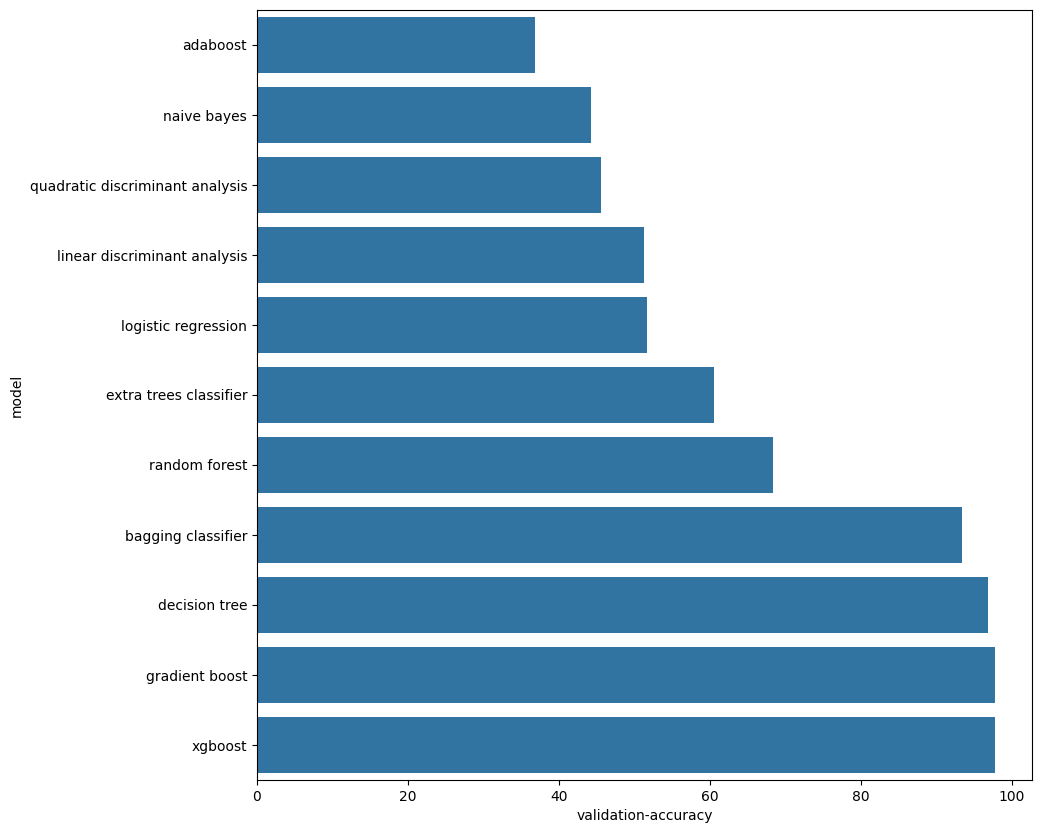

In [140]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')


## Confusion Matrix

In [141]:
# target_values_label = True

y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)

if target_values_label:
  Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]
else:
  Label = ['v_'+str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [142]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [143]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight



In [144]:
aka_plot.plot_important_features(model,df_filtered)

In [145]:
# feat_names = df_filtered.columns[:-1]
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, feature_names=feat_names)

# Neural Net

In [146]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)
y_pred = myNN.predict(model)

2 nodes, dropout 0.05, lr 0.01, batch size 2
8/8 [==============================] - 0s 2ms/step - loss: 1.7453 - accuracy: 0.3728
2 nodes, dropout 0.05, lr 0.01, batch size 4
8/8 [==============================] - 0s 2ms/step - loss: 1.5449 - accuracy: 0.4605
2 nodes, dropout 0.05, lr 0.1, batch size 2
8/8 [==============================] - 0s 3ms/step - loss: 2.2364 - accuracy: 0.1667
2 nodes, dropout 0.05, lr 0.1, batch size 4
8/8 [==============================] - 0s 2ms/step - loss: 2.2476 - accuracy: 0.1667
2 nodes, dropout 0.1, lr 0.01, batch size 2
8/8 [==============================] - 0s 3ms/step - loss: 1.4064 - accuracy: 0.3246
2 nodes, dropout 0.1, lr 0.01, batch size 4
8/8 [==============================] - 0s 5ms/step - loss: 1.6945 - accuracy: 0.1667
2 nodes, dropout 0.1, lr 0.1, batch size 2
8/8 [==============================] - 0s 4ms/step - loss: 2.2645 - accuracy: 0.1667
2 nodes, dropout 0.1, lr 0.1, batch size 4
8/8 [==============================] - 0s 3ms/step - 

## Confusion Matrix

In [147]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
# Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [148]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [149]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Plot Important Features by Weight


In [150]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, feature_names=feat_names)